In [122]:
import torch
import torchvision
import torchvision.transforms as transforms

In [123]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
train_set = torchvision.datasets.CIFAR10(root = "./data", train=True, download = True, transform = transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 4, shuffle = True, num_workers = 2)
test_set = torchvision.datasets.CIFAR10(root = "./data", train = False, download = True, transform = transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 4, shuffle = False, num_workers = 2)
classes = ("Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck")

Files already downloaded and verified
Files already downloaded and verified


  Cat   Cat Airplane   Dog


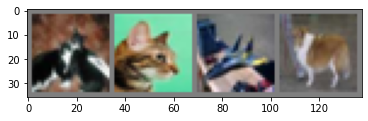

In [124]:
#some images from train dataset
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
  img = img/2+0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
data_iter = iter(train_loader)
images, labels = next(data_iter)
imshow(torchvision.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

In [125]:
# CNN architecture with 1 FC layer
import torch.nn as nn
import torch.nn.functional as F
 
 
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 50)
    self.fc4 = nn.Linear(50, 20)
    self.fc5 = nn.Linear(20, 10)

 
  def forward(self, x):
    x = self.pool(torch.tanh(self.conv1(x)))
    x = self.pool(torch.tanh(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = torch.sigmoid(self.fc1(x))
    x = torch.sigmoid(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    x = torch.sigmoid(self.fc4(x))
    x = self.fc5(x)
    return x
 
cnn = CNN()

In [126]:
cnn

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=20, bias=True)
  (fc5): Linear(in_features=20, out_features=10, bias=True)
)

In [127]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr = 0.001, momentum=0.9)

In [128]:

for epoch in range(2): # loop over the dataset multiple times
 
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
# get the inputs
    inputs, labels = data
 
# zero the parameter gradients
    optimizer.zero_grad()
 
# forward + backward + optimize
    outputs = cnn(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
 
# print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0
 
print('Finished Training')

[1,  2000] loss: 2.310
[1,  4000] loss: 2.306
[1,  6000] loss: 2.306
[1,  8000] loss: 2.306
[1, 10000] loss: 2.305
[1, 12000] loss: 2.305
[2,  2000] loss: 2.306
[2,  4000] loss: 2.306
[2,  6000] loss: 2.305
[2,  8000] loss: 2.306
[2, 10000] loss: 2.306
[2, 12000] loss: 2.305
Finished Training


Expected:    Cat  Ship  Ship Airplane


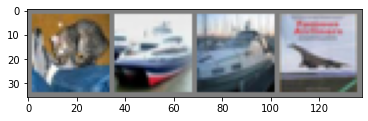

In [129]:
data_iter = iter(test_loader)
images, labels = next(data_iter)
imshow(torchvision.utils.make_grid(images))
print("Expected: ", " ".join("%5s" %classes[labels[j]] for j in range(4)))

In [130]:
outputs = cnn(images)

Predicted:    Cat  Ship  Ship Airplane


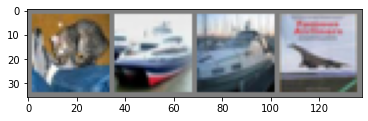

In [131]:
pred = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(images))
print("Predicted: ", " ".join("%5s" %classes[labels[j]] for j in range(4)))

In [132]:
right = 0
all = 0
with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = cnn(images)
    _, pred = torch.max(outputs.data, 1)
    all += labels.size(0)
    right += (pred == labels).sum().item()
  print("Test Accuracy: %d %%" % (100*right/all))

Test Accuracy: 10 %
